In [514]:
# !pip install seaborn
#!pip install pandas_profiling

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("df_final.csv")

C:\Users\agustin\AppData\Local\Temp\ipykernel_28728\1002321985.py:1: DtypeWarning: Columns (61,62,71,72,77,79,81,85,87,90,91,93,104) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_final.csv")


In [32]:
df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=109)

# Limpieza

In [33]:
from pandas_profiling import ProfileReport


profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="Profiling_report.html")

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

In [ ]:
cols = list(df.columns)
mas80 = []
menos80 = []
for col in cols:
    if (df[col].isna().sum() / len(df) > 0.80):
        mas80.append(col)
    else:
        menos80.append(col)

print(f"Cantidad de columnas con mas de 80% de nulls {len(mas80)}")
print(f"Cantidad de columnas con menos de 80% de nulls {len(menos80)}")

In [ ]:
df.drop(mas80, axis=1, inplace=True)

In [34]:
cols = list(df.columns)
mas50 = []
menos50 = []
for col in cols:
    if (df[col].isna().sum() / len(df) > 0.50):
        mas50.append(col)
    else:
        menos50.append(col)

print(f"Cantidad de columnas con mas de 50% de nulls {len(mas50)}")
print(f"Cantidad de columnas con menos de 50% de nulls {len(menos50)}")

Cantidad de columnas con mas de 50% de nulls 16
Cantidad de columnas con menos de 50% de nulls 93


In [35]:
menos50

['Unnamed: 0',
 'id',
 'Casos',
 'sup_sembrada',
 'sup_cosechada',
 'rendimiento_sup_cosechada',
 'produccion',
 'densidad_sem_m2',
 'densidad_sem_ha',
 'densidad_kg_ha',
 'distancia_hileras',
 'fecha_cosecha',
 'arena',
 'materia_organica_porc',
 'ph',
 'fosforo_0_20',
 'nitrogeno_no3_0_20',
 'nitrogeno_no3_20_40',
 'nitrogeno_no3_40_60',
 'pp_abr',
 'pp_may',
 'pp_jun',
 'pp_jul',
 'pp_ago',
 'pp_sep',
 'pp_oct',
 'pp_nov',
 'pp_dic',
 'pp_ene',
 'pp_feb',
 'pp_mar',
 'fertilizante_1_dosis',
 'fertilizante_2_dosis',
 'nitrogeno_kg_ha',
 'fosforo_kg_ha',
 'azufre_kg_ha',
 'potasio_kg_ha',
 'anegamiento_danio_porcentaje',
 'granizo_danio_porcentaje',
 'sequia_danio_porcentaje',
 'helada_danio_porcentaje',
 'plaga_danio_porcentaje',
 'maleza_danio_pporcentaje',
 'enfermedad_danio_porcentaje',
 'fuego_danio_porcentaje',
 'vuelco_danio_porcentaje',
 'residuosCosecha',
 'fertilizantesTotal',
 'combustibles',
 'semillas',
 'aporte_P',
 'extraccion_P',
 'balance_P',
 'diferencia_media',
 're

In [36]:
n_df = df[menos80]

NameError: name 'menos80' is not defined

In [37]:
n_df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=109)

In [38]:
# Deprecated

precip_columns = ['pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago', 'pp_sep', 
                  'pp_oct', 'pp_nov', 'pp_dic', 'pp_ene', 'pp_feb', 'pp_mar', 
                  'pp_abr_2', 'pp_may_2', 'pp_jun_2', 'pp_jul_2', 'pp_ago_2', 
                  'pp_sep_2', 'pp_oct_2', 'pp_nov_2', 'pp_dic_2']
# 
# # Create the new variable and calculate the sum
# n_df['pp'] = n_df[precip_columns].sum(axis=1) # cambiar esto por la media por departamento
# n_df.drop(columns=precip_columns, inplace=True)

In [39]:
n_df.drop(columns=precip_columns, inplace=True)


KeyError: "['pp_abr_2', 'pp_may_2', 'pp_jun_2', 'pp_jul_2', 'pp_ago_2', 'pp_sep_2', 'pp_oct_2', 'pp_nov_2', 'pp_dic_2'] not found in axis"

In [40]:
n_df.describe()

,Unnamed: 0,id,Casos,sup_sembrada,sup_cosechada,rendimiento_sup_cosechada,produccion,densidad_sem_m2,densidad_sem_ha,densidad_kg_ha,...,balance_P,diferencia_media,rendimiento_indice,campanas_distintas_incremental,campanas_consecutivas_incremental,indice_intensificacion_incremental,proporcion_gramineas_incremental,TonCO2_ha,Column,Year
count,49166.000000,49166.000000,49166.000000,49166.000000,49166.000000,49158.000000,49158.000000,49136.000000,4.913600e+04,47018.000000,...,48918.000000,49158.000000,49158.000000,49166.000000,49166.000000,49052.000000,49052.000000,49166.000000,49166.000000,49166.000000
mean,24582.500000,311712.274285,23606.970381,54.209967,52.770803,5027.017637,264.161182,113.921762,1.137388e+06,70.882702,...,19.181213,54.594089,101.059482,2.971911,2.058577,1.268016,0.502558,196.546085,24580.085150,2018.813692
std,14193.146004,98008.529391,20000.276839,50.985204,50.408229,4470.689285,347.878871,144.867614,1.447276e+06,53.693182,...,8.117401,1597.976522,29.758341,2.455387,1.785197,0.195049,0.157526,391.154939,14191.193707,5.490829
min,0.000000,326.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000e+00,2.481994,...,0.000000,-33274.400000,0.000000,0.000000,0.000000,1.000000,0.000000,27.144000,0.000000,2006.000000
25%,12291.250000,307961.250000,4445.250000,22.100000,21.110000,2783.000000,74.400000,7.000000,7.000000e+04,5.582137,...,13.680000,-550.277037,86.071977,1.000000,1.000000,1.154762,0.400000,148.304260,12291.250000,2014.000000
50%,24582.500000,346257.500000,20784.500000,42.000000,41.000000,3968.610000,164.001300,42.800000,4.280000e+05,70.000000,...,19.096000,63.032966,101.699237,2.000000,1.000000,1.250000,0.500000,180.206000,24582.500000,2021.000000
75%,36873.750000,368089.750000,38140.750000,71.000000,70.000000,6111.775000,323.633000,280.000000,2.800000e+06,125.000000,...,24.624000,697.772406,117.054720,4.000000,2.000000,1.333333,0.600000,206.596000,36856.750000,2024.000000
max,49165.000000,421838.000000,67505.000000,2112.300000,2112.300000,77259.000000,7919.694000,835.000000,8.350000e+06,350.000000,...,142.050080,56617.836818,574.000000,16.000000,14.000000,2.000000,1.000000,27521.000000,49165.000000,2024.000000


In [41]:
counts = n_df.isnull().sum()
counts.reset_index().sort_values(by = 0 , ascending = False)

,index,0
93,fertilizante_2_momento,39037
104,maleza_problema,38119
81,resiembra,38092
79,sistema_siembra,37826
86,capacidad_uso,37755
...,...,...
63,provincia,0
64,departamento,0
66,establecimiento,0
67,lote,0


#### Variables que no se tocan

     menos de 10% de nulls
     id', 'Casos', 'extra_crea', 'provincia', 'departamento', 'localidad'
     fosforo, sup_cosechada, distancia_hileras, fertilizacion, decanto_fecha_siembra, calidad hambiente
     tenenncia, subgrupo, sup_sembrada, genetica, semillero, riego, cultuivo
    
### Variables a analizar

    mas de 10% pero menos de 50% de nulls
    ph, version_biotecnologica, resiembra, densidad_sem_m2, densida_sem_ha, primera_segunda, 
    sisitema_siembra, fecha_cosecha, nitrogeno, extra_crea, influencia_napa
    
### variables con muy pocos registros

    mas de 50% pero menos de 80% de nulls
    sistema_labranza, pp_campana, claficiacion_ambiental, ciclo, nitrogeno, denisdad_kg_ha, ambiente_salino,
    arcilla, limo, temprano_tardio, azufre_ppm, arena, sistematizado, nitrogenoi, nievel_informacion,
    capacidad_uso, poblacion_pl_ha
    

  las de nitrogeno si no aparece poner no detectable
    

In [42]:
df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'densidad_sem_ha', 'densidad_kg_ha',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=109)

In [43]:
n_df["ph"].describe()

# como tiene una media de 6.34 y un desvio de 0.5 se procede a remplazar los valores nulos por la media de la provinicia

count    49145.000000
mean         6.280645
std          0.479610
min          2.200000
25%          6.080000
50%          6.300000
75%          6.460000
max         16.000000
Name: ph, dtype: float64

In [44]:
ph_suelo = n_df.groupby(["localidad"])["ph"].mean().reset_index().sort_values(by = "ph", ascending = False)
ph_suelo = ph_suelo.rename(columns={"ph": "ph_localidad"})

n_df = pd.merge(n_df, ph_suelo, on="localidad", how="left")
n_df["ph"] = np.where(n_df["ph"].isnull(), n_df["ph_localidad"], n_df["ph"] )
n_df.drop(columns=["ph_localidad"], inplace=True)


In [45]:
# si la varible resiembra esta vacia se asume como negativo

n_df["resiembra"] = n_df["resiembra"].fillna("no")

In [46]:
# si la varible extra_crea esta vacia se asume como negativo

n_df["extra_crea"] = n_df["extra_crea"].fillna("no")

In [47]:
n_df.sort_values(by = "id", ascending = False)
n_df["fecha_cosecha"] = n_df["fecha_cosecha"].fillna(method="ffill")

C:\Users\agustin\AppData\Local\Temp\ipykernel_28728\2106624252.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  n_df["fecha_cosecha"] = n_df["fecha_cosecha"].fillna(method="ffill")


In [48]:
n_df["primera_segunda"].unique() # entender antes de remplazar

array([nan, '1deg', '2deg'], dtype=object)

In [49]:
n_df["densidad_sem_m2"].describe()

dens_prov = n_df.groupby(["provincia"])["densidad_sem_m2"].agg(["mean", "std"]).reset_index()
dens_prov = dens_prov.rename(columns={"mean": "densidad_sem_m2_mean", "std": "densidad_sem_m2_std"})
dens_prov = dens_prov.sort_values(by="densidad_sem_m2_mean", ascending=False)
dens_prov

,provincia,densidad_sem_m2_mean,densidad_sem_m2_std
4,corrientes,340.000000,0.000000
5,entre.rios,234.200920,189.664929
10,santa.fe,217.883568,166.278311
7,mendoza,183.235988,192.336267
6,la.pampa,120.288773,112.126356
0,buenos.aires,101.444661,133.402205
3,cordoba,87.992131,134.487819
2,chaco,87.940000,137.141453
11,santiago.del.estero,54.363213,97.796668
1,catamarca,29.000000,4.592484


In [50]:
napa_agrup = n_df.groupby(["lote", "influencia_napa"])["id"].count()
napa_agrup

lote                  influencia_napa
0036e27c05e27167b87c  si                 4
00397d99acc92ad006b2  no                 1
003eca1beef7de813ccc  no                 1
004a410340a3e38edb9e  no                 6
                      si                 9
                                        ..
ffc956f4f856871b7c72  no                 3
ffca2190337e679ce2ac  no                 1
fff68c771f35d523a09a  si                 1
fff98579e358bb9210ee  no                 3
                      si                 2
Name: id, Length: 6155, dtype: int64

In [51]:
n_df['influencia_napa'] = n_df.groupby('lote')['influencia_napa'].transform(lambda x: 
                                x.fillna('si') if 'si' in x.values else 
                                x.fillna('no') if 'no' in x.values else 
                                'no')

In [52]:
df["sistema_siembra"].unique()

array([nan, 'neumatico', 'placa', 'chorrillo', 'placadosisfija',
       'neumaticodosisfija', 'neumaticodosisvariable',
       'chorrillodosisfija', 'placadosisvariable',
       'chorrillodosisvariable', 'voleadora', 'otro', 'manual', 'avion',
       'mecanica'], dtype=object)

In [53]:
df["sistema_siembra"].describe()

sist_siemb = n_df.groupby(["sistema_siembra", "localidad"])["id"].count()
sist_siemb

sistema_siembra     localidad            
avion               huanchillas               2
                    jesusmaria                2
                    santacatalinaholmberg     1
chorrillo           25demayo                 29
                    30deagosto                5
                                             ..
placadosisvariable  rincondenogoya            2
                    victoria                  1
                    villaurquiza              1
voleadora           calchin                   2
                    sanmigueldelmonte         1
Name: id, Length: 1109, dtype: int64

In [54]:
modas_por_localidad = n_df.groupby('localidad')['sistema_siembra'].apply(lambda x: x.mode()[0] if not x.dropna().empty else 'Valor_por_defecto')
n_df['sistema_siembra'] = n_df.apply(lambda row: modas_por_localidad[row['localidad']] if pd.isnull(row['sistema_siembra']) else row['sistema_siembra'], axis=1)


KeyError: nan

In [ ]:
n_df.groupby(["version_biotecnologica"])["id"].count().reset_index().sort_values(by="id", ascending = False)


In [55]:
n_df["cultivo"].unique()

array(['trigo', 'cebada', 'maiz', 'girasol', 'colza', 'soja', 'centeno',
       'triticale', 'avena', 'cebadilla', 'alpiste', 'arveja', 'ryegrass',
       'vicia', 'garbanzo', 'sorgo', 'carinata', 'lino', 'rabanito',
       'arroz', 'lenteja', 'tricepiro', 'algodon', 'mani',
       'multiespeciesanuales', 'cultivodeservicio', 'poroto',
       'canadeazucar', 'lotus'], dtype=object)

In [56]:
n_df["version_biotecnologica"] = np.where((n_df["version_biotecnologica"].isnull()) & (n_df["cultivo"] != "maiz") & (n_df["cultivo"] != "girasol"), "No aplica", "no bt") 

# version biotecnologica solo aplica para miaz y trigo

In [57]:
n_df["densidad_sem_m2"] = np.where(n_df["densidad_sem_m2"].isnull(), n_df["densidad_sem_ha"] * 10000, n_df["densidad_sem_m2"] )


In [58]:
dens_prob_lote = n_df.groupby(['lote', 'densidad_sem_m2']).agg({'densidad_sem_m2': ['mean', 'std'], 'id': 'count'}).reset_index()
dens_prob_lote.columns = ['lote', 'densidad_sem_m2', 'media_densidad_sem_m2', 'desvio_densidad_sem_m2', 'count']
dens_prob_lote.sort_values(by='count', ascending=False)


,lote,densidad_sem_m2,media_densidad_sem_m2,desvio_densidad_sem_m2,count
14770,c2295235a535ea3e85b7,42.80,42.80,0.0,1077
15323,c4ca4238a0b923820dcc,42.80,42.80,0.0,542
16102,c81e728d9d4c2f636f06,42.80,42.80,0.0,314
19221,eccbc87e4b5ce2fe2830,42.80,42.80,0.0,295
12684,a87ff679a2f3e71d9181,42.80,42.80,0.0,247
...,...,...,...,...,...
7974,6d646e2e80e249143940,3.80,3.80,NaN,1
7977,6d646e2e80e249143940,302.40,302.40,NaN,1
7978,6d646e2e80e249143940,324.80,324.80,NaN,1
7980,6d689000e1d642bde4d9,5.72,5.72,NaN,1


In [59]:
n_df["densidad_sem_m2"].describe() # cantidad de plantas que se siembran en un área específica

dens_prob = n_df.groupby('lote')['densidad_sem_m2'].apply(lambda x: x.mean())

# Reemplaza los valores nulos por la densidad promedio correspondiente a cada lote
n_df['densidad_sem_m2'] = n_df.apply(lambda row: dens_prob[row['lote']] if pd.isnull(row['densidad_sem_m2']) else row['densidad_sem_m2'], axis=1)


In [60]:
n_df['densidad_sem_m2'].isnull().sum()


# quedan nulos a priori porque no hay suficiente informacion para remplazarlos
# vamos a usar modelos que acepten nulos

3

In [61]:
# vuelo densidad_sem_ha y solo me quedo con densidad sem m2

n_df.drop(["densidad_sem_ha"], inplace=True, axis=1)


In [62]:
n_df["nivel_informacion"].unique()

n_df.drop("nivel_informacion", inplace=True, axis=1)

In [63]:
n_df.groupby([ "sistema_labranza"])["id"].count().reset_index().sort_values(by="id", ascending = False)


# es muy grande la diferencia entre la cuenta de siembra diercta y el resto. se procede a remplazar los nulos por siembra directa

,sistema_labranza,id
5,siembradirecta,11573
1,convencional,213
3,minima,103
0,aerea,8
4,otro,4
6,voleo,3
2,descepe+descompactado+rastra+rolo,2


In [64]:
n_df["sistema_labranza"] = np.where(n_df["sistema_labranza"].isnull(), "siembra directa", n_df["sistema_labranza"])

In [65]:
n_df.groupby([ "sistematizado"])["id"].count().reset_index().sort_values(by="id", ascending = False)

# cambio nulos por no sistematizado, dos razones: es la moda + no podemos asumir tecnologia sin estar seguros

KeyError: 'sistematizado'

In [ ]:
n_df["pp_campana"].describe()

n_df["pp_campana"].isnull().sum() # 50% de nulls 

In [66]:
n_df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'densidad_kg_ha', 'distancia_hileras',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=107)

In [67]:
n_df.groupby(["localidad", "pp_campana"])["id"].count().reset_index().sort_values(by="id", ascending = False)

# LOGICA
# Para los valores nulos de pp_camapa quiero remplazarlos por la media de pp_campana parala misma fecha de siembra y fecha de cosecha en la misma localidad


n_df['fecha_siembra'] = pd.to_datetime(n_df['fecha_siembra'])
n_df['fecha_cosecha'] = pd.to_datetime(n_df['fecha_cosecha'])

n_df['duracion_campaña'] = n_df['fecha_cosecha'] - n_df['fecha_siembra']

df['pp_campana'] = df.groupby(['localidad', 'fecha_siembra', 'fecha_cosecha'])['pp_campana'].transform(lambda x: x.fillna(x.mean()) if x.isnull().any() else x)

n_df['fecha_siembra'] = n_df['fecha_siembra'].fillna('')
n_df['fecha_cosecha'] = n_df['fecha_cosecha'].fillna('')

# no se pudieron resolver los nulos, se van a eliminar las columnas y cuando se consiga un dataset de precipitaciones se hara un data augmentation


KeyError: 'pp_campana'

In [68]:
n_df[['pp_campana','fecha_siembra', 'fecha_cosecha', "duracion_campaña"]]


KeyError: "['pp_campana', 'fecha_siembra', 'duracion_campaña'] not in index"

In [69]:
n_df.drop("pp_campana", inplace=True, axis=1)

KeyError: "['pp_campana'] not found in axis"

In [70]:
n_df["ciclo"].unique() # Ciclo → Clasificación por cultivo según el tiempo transcurrido desde su emergencia a madurez fisiológica.

n_df.groupby(["cultivo", "ciclo"])["id"].count().reset_index().sort_values(by = ["cultivo", 'id'], ascending = False)


,cultivo,ciclo,id
26,trigo,intermedio,2806
25,trigo,corto,1856
29,trigo,largo,856
28,trigo,intermedio.largo,554
27,trigo,intermedio.corto,170
13,soja,ivlargo,6918
12,soja,ivcorto,3164
10,soja,iiilargo,2908
15,soja,vcorto,887
9,soja,iiicorto,626


In [71]:
ciclo_mas_repetido = {
    "trigo": "intermedio",
    "soja": "iv largo",
    "maiz": "largo",
    "girasol": "largo",
    "cebada": "intermedio"
}

n_df["ciclo"] = n_df["ciclo"].fillna(n_df["cultivo"].map(ciclo_mas_repetido))

In [72]:
n_df["temprano_tardio"].isnull().sum()  #7082 nulls
n_df.groupby(["temprano_tardio"])["id"].count().reset_index().sort_values(by = "id", ascending=False) # si no es maiz poner no aplica


,temprano_tardio,id
1,temprano,9474
0,tardio,3916


In [73]:
n_df["mes_fecha_cosecha"] = pd.to_datetime(n_df["fecha_cosecha"], format="%m")

n_df["temprano_tardio"] = np.where(
    (n_df["temprano_tardio"].isnull()) & (n_df["cultivo"] != "maiz"),
    "No aplica",
    np.where(
        (n_df["mes_fecha_cosecha"].notnull()) &
        (n_df["mes_fecha_cosecha"].dt.month > 11),
        "tardio",
        "temprano"
    )
)

ValueError: unconverted data remains when parsing with format "%m": "006-11-23", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [74]:

n_df["temprano_tardio"] = np.where((n_df["temprano_tardio"].isnull()) & (n_df["cultivo"] != "maiz"), "No aplica", "temprano") 

In [75]:

n_df["capacidad_uso"].isnull().sum()  #6072 nulls
n_df["capacidad_uso"].unique() 

n_df.groupby(["capacidad_uso"])["id"].count().reset_index().sort_values(by="id", ascending = False)

,capacidad_uso,id
1,ii,6435
4,iii,2581
0,i,1480
6,iv,520
9,vi,220
8,v,157
10,vii,6
2,iies,4
3,iiew,3
7,ptoscanorte,2


In [76]:
n_df["poblacion_pl_ha"].describe() #poblacion plantas por ha

promedio_localidad = n_df.groupby('localidad')['poblacion_pl_ha'].mean()
promedio_lote = n_df.groupby('lote')['poblacion_pl_ha'].mean()

# Función para obtener el promedio específico del lote o de la localidad según el caso
def obtener_promedio(row):
    if pd.isnull(row['poblacion_pl_ha']):
        lote = row['lote']
        if lote in promedio_lote:
            return promedio_lote[lote]
        else:
            return promedio_localidad[row['localidad']]
    else:
        return row['poblacion_pl_ha']

# Aplicar la función para reemplazar los valores nulos en poblacion_pl_ha
n_df["poblacion_pl_ha"] = n_df.apply(obtener_promedio, axis=1)


KeyError: 'poblacion_pl_ha'

In [77]:
# n_df["nitrogeno_no3_0_20"].fillna("no detectable")
# n_df["nitrogeno_no3_20_40"].fillna("no detectable")
# n_df["nitrogeno_no3_40_60"].fillna("no detectable")

In [78]:
(n_df["provincia"].unique())

array(['entre.rios', 'buenos.aires', 'cordoba', 'la.pampa', 'santa.fe',
       'mendoza', 'santiago.del.estero', 'chaco', 'corrientes', 'salta',
       'san.luis', 'tucuman', 'catamarca'], dtype=object)

In [79]:
n_df["ambiente_salino"].unique() # si el suelo tiene salinidad --> voy a usar la moda de la zona para si o no

amb_sal = n_df.groupby(["localidad", "ambiente_salino"])["id"].count().reset_index().sort_values(by="localidad", ascending = True)
amb_sal.rename(columns={"id": "count"}, inplace=True)

amb_sal_max = amb_sal.groupby("localidad").first().reset_index()
n_df = pd.merge(n_df, amb_sal_max, on="localidad", suffixes=('_original', '_max'))
n_df["ambiente_salino"] = np.where(n_df["ambiente_salino_original"].isnull(), n_df["ambiente_salino_max"], n_df["ambiente_salino_original"])
n_df.drop("ambiente_salino_max", inplace = True, axis = 1)


KeyError: 'ambiente_salino'

In [80]:
n_df.drop(["densidad_kg_ha"], inplace = True, axis = 1) # se elimina porque ya hay una variable que explica lo mismo con nas rempleazados

In [81]:
n_df["azufre_ppm"].isnull().sum() # se elimina la variable ya que tiene muchos nuls y no se puede suponer la aplicacion de tecnologia y productos aplicados con certeza

#n_df.drop(["azufre_ppm"], inplace=True, axis = 1)

KeyError: 'azufre_ppm'

In [82]:
n_df[["arcilla", "limo", "arena"]]

#n_df["materiales_en_suelo"] = n_df[["arcilla", "limo", "arena"]].sum(axis=1) 

KeyError: "['arcilla', 'limo'] not in index"

In [83]:
n_df.groupby(["provincia", "capacidad_uso"])["id"].count().reset_index().sort_values(by = ["provincia","id"], ascending =  False)


# ver q hacer con esta

,provincia,capacidad_uso,id
26,santa.fe,i,451
27,santa.fe,ii,149
29,santa.fe,iv,99
28,santa.fe,iii,75
30,santa.fe,v,1
20,la.pampa,ii,113
21,la.pampa,iii,54
19,la.pampa,i,27
22,la.pampa,iv,13
24,la.pampa,v,9


In [84]:
import pandas as pd

def detect_outliers_iqr(data):
    outliers_columns = []
    for column in data.select_dtypes(include='number'):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data[(data[column] < lower_bound) | (data[column] > upper_bound)].index
        if len(outlier_indices) > 0:
            outliers_columns.append(column)
    return outliers_columns


outliers_vars = detect_outliers_iqr(n_df)
print("Variables con outliers:")
print(outliers_vars)

Variables con outliers:
['id', 'sup_sembrada', 'sup_cosechada', 'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2', 'distancia_hileras', 'arena', 'materia_organica_porc', 'ph', 'fosforo_0_20', 'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 'pp_abr', 'pp_may', 'pp_jun', 'pp_jul', 'pp_ago', 'pp_sep', 'pp_oct', 'pp_nov', 'pp_dic', 'pp_ene', 'pp_feb', 'pp_mar', 'fertilizante_1_dosis', 'fertilizante_2_dosis', 'nitrogeno_kg_ha', 'fosforo_kg_ha', 'azufre_kg_ha', 'potasio_kg_ha', 'anegamiento_danio_porcentaje', 'granizo_danio_porcentaje', 'sequia_danio_porcentaje', 'helada_danio_porcentaje', 'plaga_danio_porcentaje', 'maleza_danio_pporcentaje', 'enfermedad_danio_porcentaje', 'fuego_danio_porcentaje', 'vuelco_danio_porcentaje', 'residuosCosecha', 'fertilizantesTotal', 'combustibles', 'semillas', 'aporte_P', 'extraccion_P', 'balance_P', 'diferencia_media', 'rendimiento_indice', 'campanas_distintas_incremental', 'campanas_consecutivas_incremental', 'indice_intensifi

### Variables con outliers

    'sup_sembrada', 'sup_cosechada', 'rendimiento_sup_cosechada' --> datos reales, es logico el outlier, no se trata
    'produccion', 
    'densidad_sem_m2', 
    'poblacion_pl_ha',
    'distancia_hileras', 
    'arena', 'limo', 'arcilla', 
    'materia_organica_porc', 
    'ph', 'fosforo_0_20', 
    'nitrogeno_no3_0_20', 'nitrogeno_no3_20_40', 'nitrogeno_no3_40_60', 
    'pp_campana', 
    'duracion_campaña', 
    'materiales_en_suelo'

In [85]:
import matplotlib.pyplot as plt

def plot_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data_no_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    plt.figure(figsize=(10, 6))
    
    plt.scatter(data_no_outliers.index, data_no_outliers[column], color='blue', label='Datos sin outliers')
    
    plt.scatter(outliers.index, outliers[column], color='red', label='Outliers')
    
    plt.title('Gráfico de Outliers para {}'.format(column))
    plt.xlabel('Índice')
    plt.ylabel(column)
    plt.legend()
    plt.show()


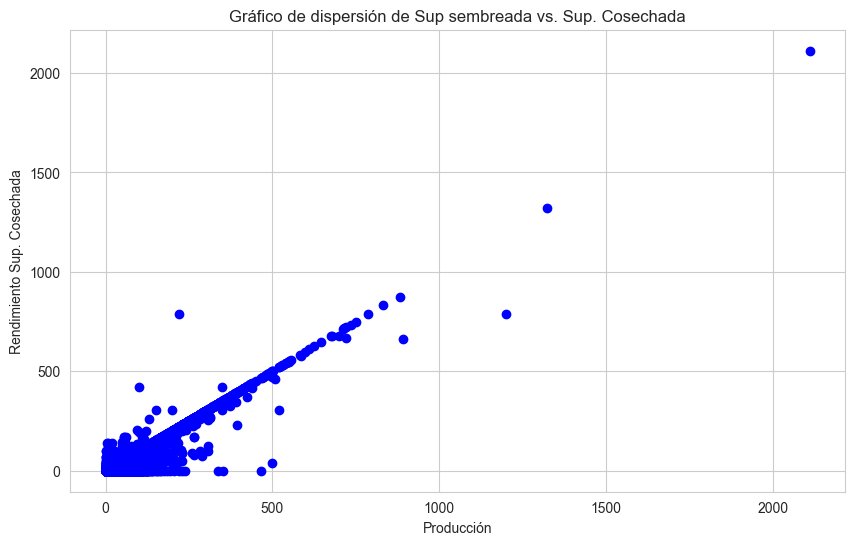

In [86]:
plt.figure(figsize=(10, 6))
plt.scatter(n_df['sup_sembrada'], n_df['sup_cosechada'], color='blue')
plt.title('Gráfico de dispersión de Sup sembreada vs. Sup. Cosechada')
plt.xlabel('Producción')
plt.ylabel('Rendimiento Sup. Cosechada')
plt.grid(True)
plt.show()

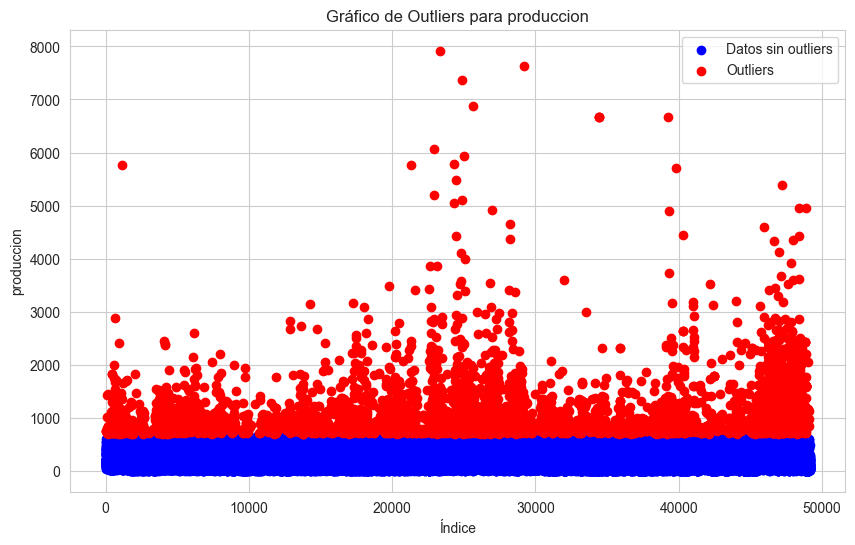

In [87]:
plot_outliers(n_df, 'produccion')


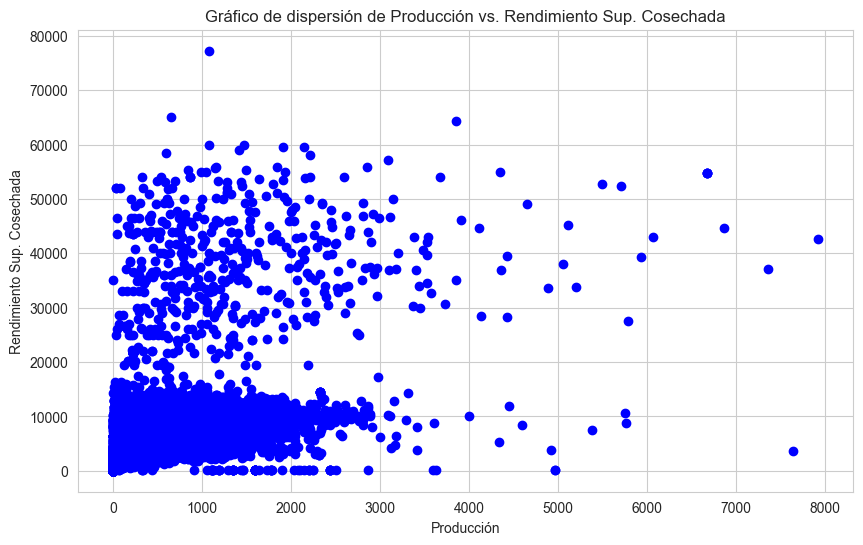

In [88]:
plt.figure(figsize=(10, 6))
plt.scatter(n_df['produccion'], n_df['rendimiento_sup_cosechada'], color='blue')
plt.title('Gráfico de dispersión de Producción vs. Rendimiento Sup. Cosechada')
plt.xlabel('Producción')
plt.ylabel('Rendimiento Sup. Cosechada')
plt.grid(True)
plt.show()

# chequear outliers aca

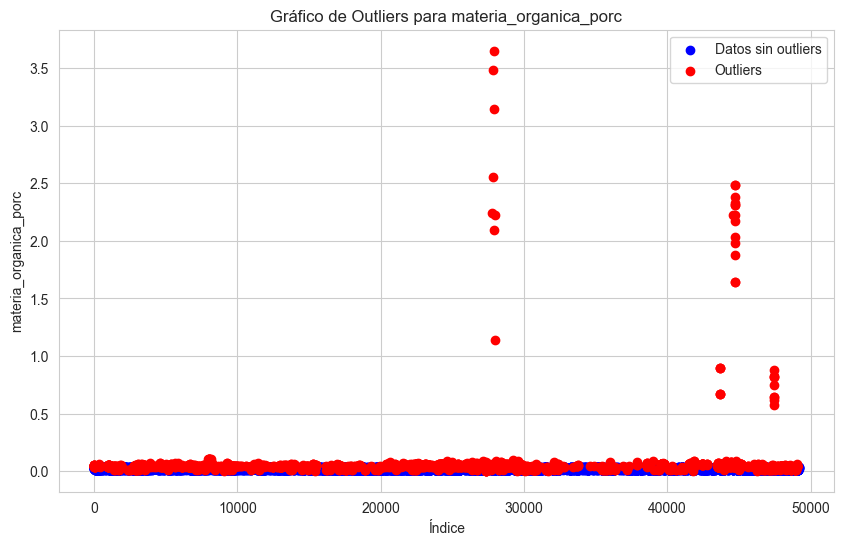

In [89]:
plot_outliers(n_df, 'materia_organica_porc')

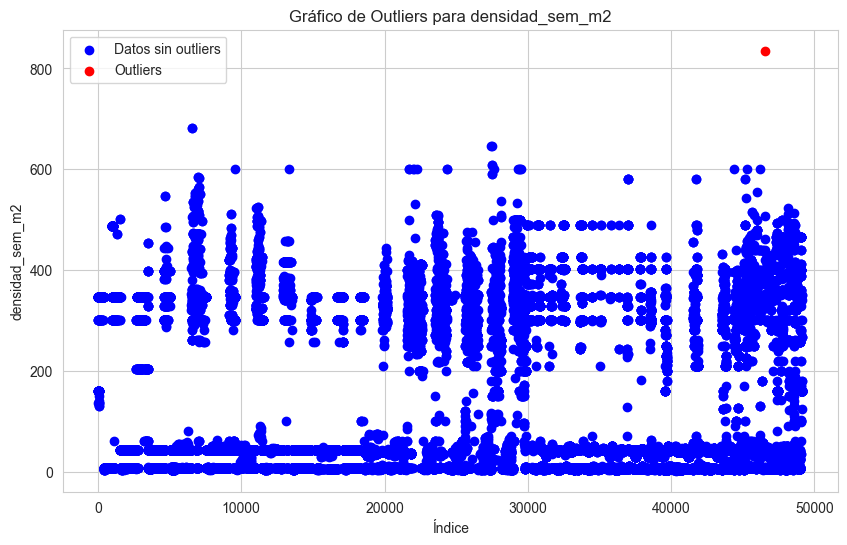

In [90]:
plot_outliers(n_df, 'densidad_sem_m2')
# muy pocos, cambiar  por mediana o media sin outliers


In [91]:
plot_outliers(n_df, "poblacion_pl_ha")
median = n_df['poblacion_pl_ha'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['poblacion_pl_ha'].quantile(0.25)
Q3 = n_df['poblacion_pl_ha'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['poblacion_pl_ha'] = n_df['poblacion_pl_ha'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
# por mediana o media sin outliers

KeyError: 'poblacion_pl_ha'

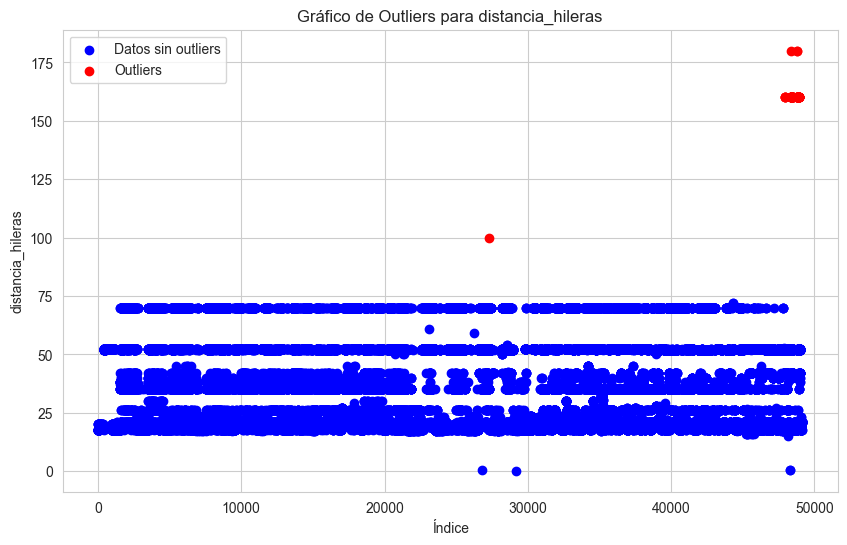

In [92]:
plot_outliers(n_df, "distancia_hileras")
median = n_df['distancia_hileras'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['distancia_hileras'].quantile(0.25)
Q3 = n_df['distancia_hileras'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['distancia_hileras'] = n_df['distancia_hileras'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)
# por mediana o media sin outliers

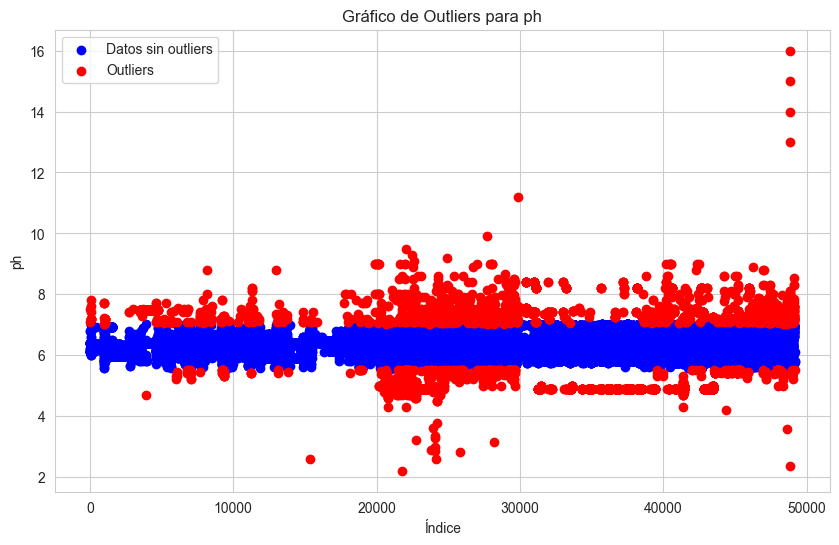

In [93]:
plot_outliers(n_df, "ph")

median = n_df['ph'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['ph'].quantile(0.25)
Q3 = n_df['ph'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['ph'] = n_df['ph'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)

In [94]:
n_df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'distancia_hileras', 'fecha_cosecha',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=106)

In [95]:
plot_outliers(n_df, "duracion_campaña")


median = n_df['duracion_campaña'].median()

# Calcular el rango intercuartílico (IQR)
Q1 = n_df['duracion_campaña'].quantile(0.25)
Q3 = n_df['duracion_campaña'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Reemplazar los outliers por la mediana
n_df['duracion_campaña'] = n_df['duracion_campaña'].apply(lambda x: median if x < lower_limit or x > upper_limit else x)

KeyError: 'duracion_campaña'

In [96]:

def outliers_nitr(df, var):
    median = df[var].median()
    
    # Calcular el rango intercuartílico (IQR)
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir los límites para los outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Reemplazar los outliers por la mediana
    df[var] = df[var].apply(lambda x: median if x < lower_limit or x > upper_limit else x)


outliers_nitr(n_df, "nitrogeno_no3_0_20")
outliers_nitr(n_df, "nitrogeno_no3_20_40")
outliers_nitr(n_df, "nitrogeno_no3_40_60")


# Exploracion

In [97]:
#n_df = df

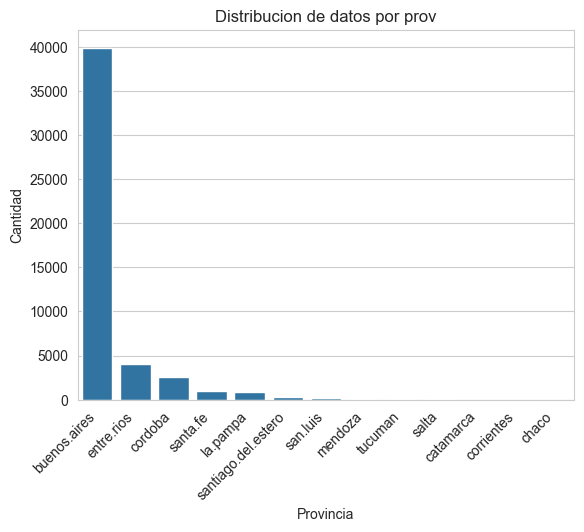

In [98]:
#extra polar para todos los datos, tambien ver cuantos datos tenemos por variable target

j = n_df.groupby(["provincia"])["id"].count()
j = j.reset_index().sort_values("id", ascending = False)
j


plt.xticks(rotation=45, ha='right')  

sns.barplot(x=j["provincia"], y=j["id"])

# Add labels and title
plt.xlabel('Provincia')
plt.ylabel('Cantidad')
plt.title('Distribucion de datos por prov')

# Show plot
plt.show()


In [99]:
cultivo_ten_prov = n_df.groupby(["provincia", "tenencia", "cultivo"])["id"].count()
cultivo_ten_prov = cultivo_ten_prov.reset_index().sort_values("id", ascending  = False)
cultivo_ten_prov = cultivo_ten_prov.reset_index().rename(columns={"id": "cuenta"})

cultivo_ten_prov 

,index,provincia,tenencia,cultivo,cuenta
0,31,buenos.aires,propio,soja,5037
1,28,buenos.aires,propio,maiz,3856
2,33,buenos.aires,propio,trigo,2757
3,16,buenos.aires,arrendado,soja,1558
4,12,buenos.aires,arrendado,maiz,1332
...,...,...,...,...,...
166,19,buenos.aires,arrendado,vicia,1
167,143,santa.fe,propio,colza,1
168,144,santa.fe,propio,girasol,1
169,126,santa.fe,aparceria,soja,1


In [100]:
ten_subgr = n_df.groupby(["tenencia", "subgrupo"])["id"].count()
ten_subgr = ten_subgr.reset_index().sort_values("id", ascending  = False)
ten_subgr = ten_subgr.reset_index().rename(columns={"id": "cuenta"})

ten_subgr 

,index,tenencia,subgrupo,cuenta
0,54,propio,tradicional,6050
1,48,propio,ogm,5723
2,50,propio,pan,3859
3,28,arrendado,tradicional,2449
4,22,arrendado,ogm,1903
5,24,arrendado,pan,1635
6,37,propio,cervecera,653
7,33,propio,altooleico,329
8,11,arrendado,cervecera,310
9,6,aparceria,pan,246


In [101]:

#buscar relaciones
n_df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'distancia_hileras', 'fecha_cosecha',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=106)

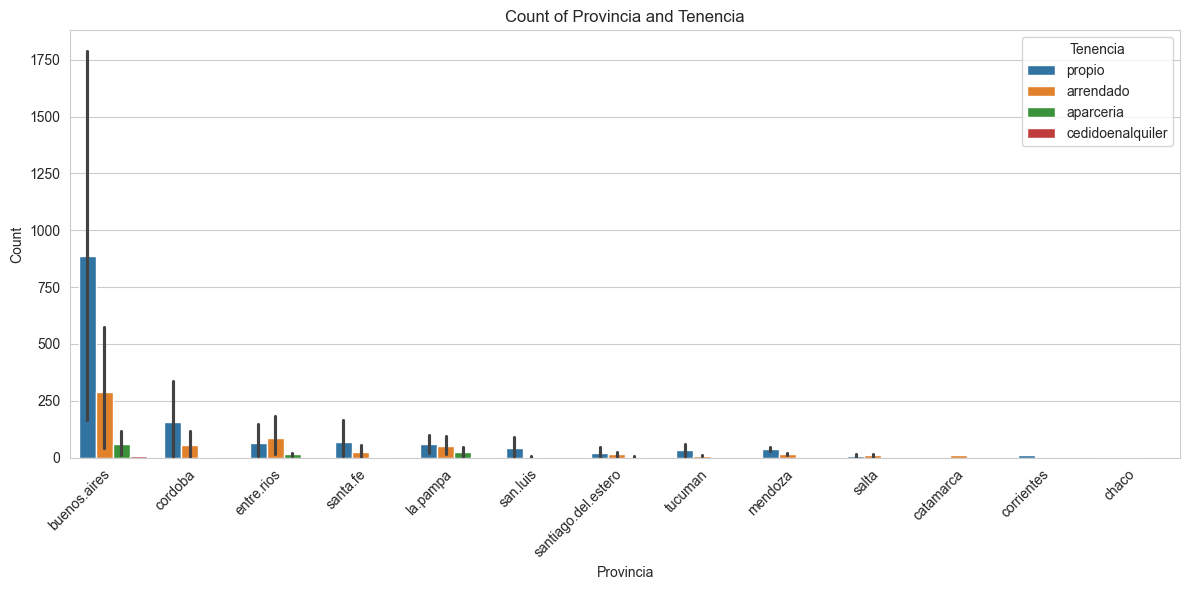

In [102]:
tenencia_prov = n_df.groupby(["provincia", "tenencia"])["id"].count()
tenencia_prov = tenencia_prov.reset_index().sort_values("id", ascending  = False)
tenencia_prov = cultivo_ten_prov.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia', y='cuenta', hue='tenencia', data=tenencia_prov)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Count')
plt.title('Count of Provincia and Tenencia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='Tenencia')

# Show plot
plt.tight_layout()
plt.show()

C:\Users\agustin\AppData\Local\Temp\ipykernel_28728\1485627579.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cultivo_prov_t5 = cultivo_prov_sorted.groupby("provincia").apply(top_5_by_province)


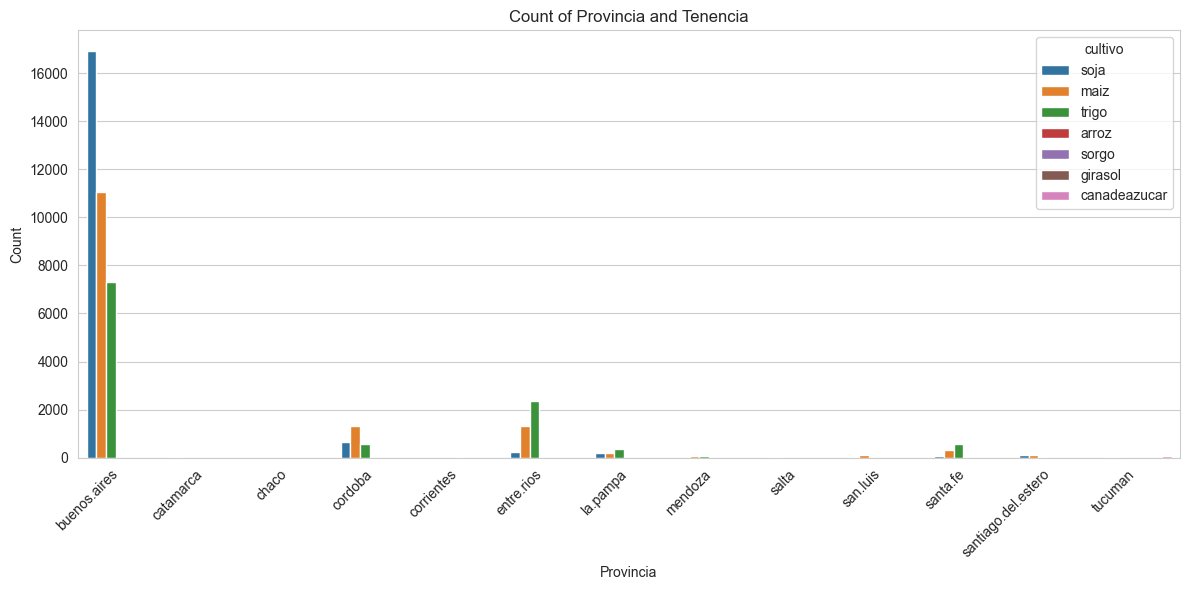

In [103]:
cultivo_prov = n_df.groupby(["provincia", "cultivo"])["id"].count()
cultivo_prov_sorted = cultivo_prov.reset_index().sort_values(["provincia", "id"], ascending  = False)

#renombrar el id

def top_5_by_province(df):
    return df.groupby("provincia").head(3)

cultivo_prov_t5 = cultivo_prov_sorted.groupby("provincia").apply(top_5_by_province)

cultivo_prov_t5.reset_index(drop=True, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='provincia', y='id', hue='cultivo', data=cultivo_prov_t5)

# Set labels and title
plt.xlabel('Provincia')
plt.ylabel('Count')
plt.title('Count of Provincia and Tenencia')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend(title='cultivo')

# Show plot
plt.tight_layout()
plt.show()

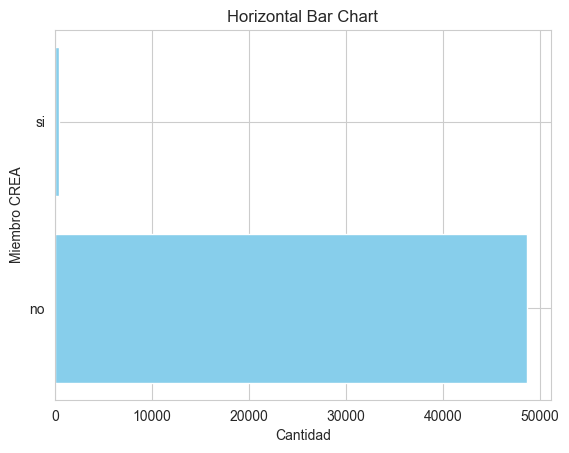

In [104]:
extra_crea = n_df.groupby(["extra_crea"])["id"].count().reset_index()

plt.barh(extra_crea["extra_crea"], extra_crea["id"], color='skyblue')
plt.xlabel("Cantidad")
plt.ylabel('Miembro CREA')
plt.title('Horizontal Bar Chart')
plt.show()

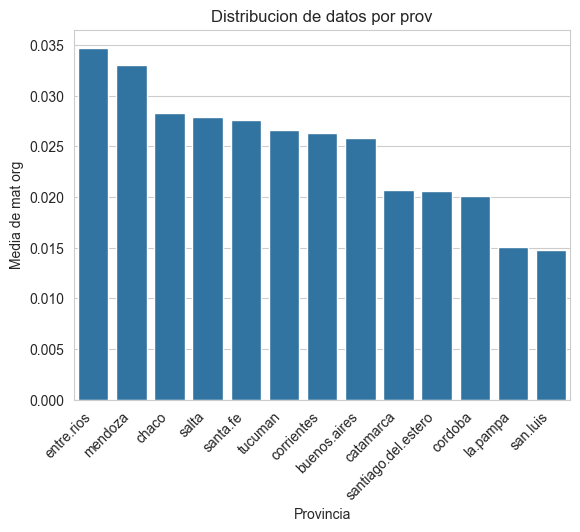

In [105]:
mat_org_prov = n_df.groupby(["provincia"])["materia_organica_porc"].mean()
mat_org_prov = mat_org_prov.reset_index().sort_values("materia_organica_porc", ascending  = False)
mat_org_prov

plt.xticks(rotation=45, ha='right')  

sns.barplot(x="provincia", y="materia_organica_porc", data = mat_org_prov)

# Add labels and title
plt.xlabel('Provincia')
plt.ylabel('Media de mat org')
plt.title('Distribucion de datos por prov')

# Show plot
plt.show()

In [106]:
cor = n_df.select_dtypes(include='number').corr()
cor["materia_organica_porc"]

Unnamed: 0                            0.057297
id                                   -0.027605
Casos                                -0.039929
sup_sembrada                          0.000808
sup_cosechada                         0.002731
rendimiento_sup_cosechada            -0.005751
produccion                           -0.004191
densidad_sem_m2                       0.058608
distancia_hileras                    -0.038436
arena                                -0.047207
materia_organica_porc                 1.000000
ph                                   -0.035353
fosforo_0_20                         -0.013434
nitrogeno_no3_0_20                    0.019981
nitrogeno_no3_20_40                  -0.000126
nitrogeno_no3_40_60                  -0.020233
pp_abr                               -0.018821
pp_may                                0.019134
pp_jun                               -0.000271
pp_jul                                0.019201
pp_ago                                0.000498
pp_sep       

In [107]:
# perfil provincia
    # hay que usar todos los datos para esto porque sino puede estar re sesgada la muestra
    

In [108]:
sup_semb_prov = n_df.groupby(["provincia"])["sup_sembrada"].mean()
sup_semb_prov = sup_semb_prov.reset_index().sort_values("sup_sembrada", ascending  = False)


sup_cos_prov = n_df.groupby(["provincia"])["sup_cosechada"].mean()
sup_cos_prov = sup_cos_prov.reset_index().sort_values("sup_cosechada", ascending  = False)

rend_sup_cos_prov = n_df.groupby(["provincia"])["rendimiento_sup_cosechada"].mean()
rend_sup_cos_prov = rend_sup_cos_prov.reset_index().sort_values("rendimiento_sup_cosechada", ascending  = False)


# agregarle tambien el desvio?

In [109]:
sup_semb_prov = n_df.groupby(["provincia"])["sup_sembrada"].mean()
sup_semb_prov = sup_semb_prov.reset_index().sort_values("sup_sembrada", ascending  = False)


sup_cos_prov = n_df.groupby(["provincia"])["sup_cosechada"].mean()
sup_cos_prov = sup_cos_prov.reset_index().sort_values("sup_cosechada", ascending  = False)

rend_sup_cos_prov = n_df.groupby(["provincia"])["rendimiento_sup_cosechada"].mean()
rend_sup_cos_prov = rend_sup_cos_prov.reset_index().sort_values("rendimiento_sup_cosechada", ascending  = False)

combined_stats = sup_semb_prov.merge(sup_cos_prov, on="provincia").merge(rend_sup_cos_prov, on="provincia")

combined_stats.rename(columns={
    "sup_sembrada": "Superficie Sembrada (ha)",
    "sup_cosechada": "Superficie Cosechada (ha)",
    "rendimiento_sup_cosechada": "Rendimiento por Superficie Cosechada (kg/ha)"
}, inplace=True)

combined_stats



,provincia,Superficie Sembrada (ha),Superficie Cosechada (ha),Rendimiento por Superficie Cosechada (kg/ha)
0,salta,180.255077,180.255077,4507.538462
1,mendoza,101.569204,101.569204,4893.982301
2,santiago.del.estero,96.698864,96.299697,5713.257725
3,san.luis,92.222803,82.128106,5459.039621
4,chaco,85.900000,85.900000,5022.804918
5,cordoba,82.073742,80.524409,6927.705781
6,entre.rios,75.946046,75.784685,4083.439564
7,tucuman,65.966300,65.751575,1477.255835
8,la.pampa,55.899027,54.128869,3488.151077
9,santa.fe,53.698507,52.830947,6524.550987


In [110]:


ph_prov = n_df.groupby(["provincia"])["ph"].mean()
ph_prov = ph_prov.reset_index().sort_values("ph", ascending  = False)


fos_prov = n_df.groupby(["provincia"])["fosforo_0_20"].mean()
fos_prov = fos_prov.reset_index().sort_values("fosforo_0_20", ascending  = False)

nit_prov = n_df.groupby(["provincia"])["nitrogeno_no3_0_20"].mean()
nit_prov = nit_prov.reset_index().sort_values("nitrogeno_no3_0_20", ascending  = False)

In [111]:


combined_stats = ph_prov.merge(fos_prov, on="provincia").merge(nit_prov, on="provincia")

combined_stats.rename(columns={
    "ph": "ph promedio",
    "fosforo_0_20": "fosforo prom",
    "nitrogeno_no3_0_20": "nitrogeno prom"
}, inplace=True)

combined_stats



,provincia,ph promedio,fosforo prom,nitrogeno prom
0,chaco,6.620500,54.770591,19.057000
1,catamarca,6.616667,11.900000,14.100000
2,santiago.del.estero,6.571938,28.876915,16.957651
3,mendoza,6.512389,6.734808,13.366947
4,tucuman,6.457692,40.186813,20.522609
5,la.pampa,6.394305,13.225228,12.499055
6,san.luis,6.387462,27.369773,12.963788
7,salta,6.351910,21.166214,19.181855
8,cordoba,6.316663,20.891363,18.178474
9,corrientes,6.300000,9.127273,NaN


In [112]:
rendimiento_por_riego = n_df.groupby('riego')['rendimiento_sup_cosechada'].mean()

rendimiento_por_riego.reset_index()

,riego,rendimiento_sup_cosechada
0,no,5024.662652
1,si,6490.720353


Correlación entre rendimiento y materia orgánica: -0.005750712449505733


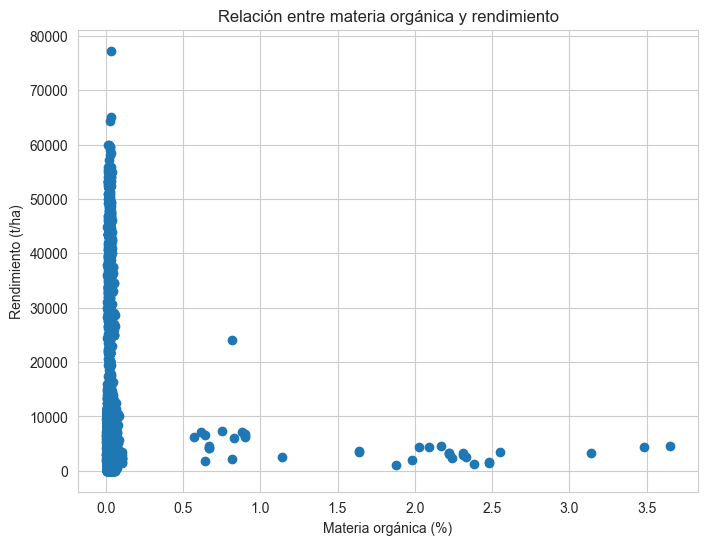

In [113]:
correlacion_rendimiento_mat_org = n_df['rendimiento_sup_cosechada'].corr(n_df['materia_organica_porc'])
correlacion_rendimiento_mat_org


# Print the correlation coefficient
print("Correlación entre rendimiento y materia orgánica:", correlacion_rendimiento_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_df['materia_organica_porc'], n_df['rendimiento_sup_cosechada'])
plt.xlabel('Materia orgánica (%)')
plt.ylabel('Rendimiento (t/ha)')
plt.title('Relación entre materia orgánica y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()


In [114]:
distribucion_mat_org_por_version_bio = n_df.groupby('version_biotecnologica')['materia_organica_porc'].count().reset_index()
distribucion_mat_org_por_version_bio.sort_values("materia_organica_porc", ascending =  False).head(10)

,version_biotecnologica,materia_organica_porc
1,no bt,31850
0,No aplica,17316


In [115]:
distribucion_mat_org_por_version_bio = n_df.groupby('version_biotecnologica')['materia_organica_porc'].mean().reset_index()
distribucion_mat_org_por_version_bio.sort_values("materia_organica_porc", ascending =  False).head(10)

#enteder q significa

,version_biotecnologica,materia_organica_porc
0,No aplica,0.029486
1,no bt,0.024208


In [116]:
numero_empresas_version_bio = n_df['version_biotecnologica'].nunique()
numero_empresas_version_bio

2

In [117]:
explicacion_genetica = n_df.groupby('genetica')['rendimiento_sup_cosechada'].mean().reset_index()
explicacion_genetica.sort_values("rendimiento_sup_cosechada", ascending = False)

,genetica,rendimiento_sup_cosechada
418,lg30.850,50906.000000
600,pan5175,49350.000000
419,lg30.860,43500.000000
402,km4480,42940.000000
336,duo30,38944.705882
...,...,...
740,tuc95-10,74.005000
408,lcp85-384,68.565355
737,tuc00-19,48.000000
478,next22.7,0.000000


In [118]:
relacion_biotecnologia_rendimiento = n_df.groupby('version_biotecnologica')['rendimiento_sup_cosechada'].mean().reset_index()
relacion_biotecnologia_rendimiento.sort_values("rendimiento_sup_cosechada", ascending = False).head(10)

,version_biotecnologica,rendimiento_sup_cosechada
1,no bt,5704.067895
0,No aplica,3781.116856


In [119]:
distribucion_fecha_cosecha = n_df['fecha_cosecha'].value_counts().reset_index()
distribucion_fecha_siembra = n_df['fecha_siembra'].value_counts().reset_index()
distribucion_fecha_cosecha
distribucion_fecha_siembra

KeyError: 'fecha_siembra'

In [120]:
afectacion_resiembra_mat_org = n_df.groupby('resiembra')['materia_organica_porc'].mean().reset_index()
afectacion_resiembra_mat_org.sort_values("materia_organica_porc", ascending = False).head(10)


,resiembra,materia_organica_porc
1,si,0.028379
0,no,0.026060


In [121]:
relacion_resiembra_riego = n_df.groupby('riego')['resiembra'].value_counts().reset_index()
relacion_resiembra_riego.sort_values("resiembra", ascending = False).head(10)

,riego,resiembra,count
1,no,si,141
3,si,si,4
0,no,no,47943
2,si,no,446


In [122]:
n_df.columns

Index(['Unnamed: 0', 'id', 'Casos', 'sup_sembrada', 'sup_cosechada',
       'rendimiento_sup_cosechada', 'produccion', 'densidad_sem_m2',
       'distancia_hileras', 'fecha_cosecha',
       ...
       'adversidad_plaga', 'adversidad_maleza', 'adversidad_enfermedad',
       'adversidad_fuego', 'adversidad_vuelco', 'maleza_problema', 'lote_id',
       'secuencia_cultivos_incremental', 'Year', 'group'],
      dtype='object', length=106)

In [123]:
corr_pp_mat_org = n_df['pp_campana'].corr(n_df['materia_organica_porc'])
corr_pp_mat_org


# Print the correlation coefficient
print("Correlación entre presipitaciones y materia orgánica:", corr_pp_mat_org)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(n_df['pp_campana'], n_df['rendimiento_sup_cosechada'])
plt.xlabel('Materia orgánica (%)')
plt.ylabel('presipitaciones')
plt.title('Relación entre presipitaciones y rendimiento')
plt.grid(True)

# Show the scatter plot
plt.show()

KeyError: 'pp_campana'